Image Classification Using Convolutional Neural Network (CNN)

cifar10 dataset contains 10 classes like airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck. 

In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading the dataset

In [65]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [66]:
X_test.shape

(10000, 32, 32, 3)

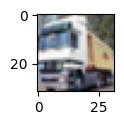

In [67]:
plt.figure(figsize=(15,1))
plt.imshow(X_train[1])

Here we see there are 50000 training images and 1000 test images

In [68]:
y_train.shape

(50000, 1)

In [69]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [70]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [71]:
y_test = y_test.reshape(-1,)

In [72]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Plot some images to see what they are 

In [73]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,1))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

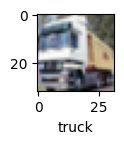

In [74]:
plot_sample(X_train, y_train, 1)

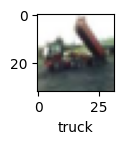

In [75]:
plot_sample(X_train, y_train, 2)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [76]:
X_train = X_train / 255.0
X_test = X_test / 255.0

build a convolutional neural network to train our images

In [77]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [78]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Sparse Categorical Crossentropy: This loss function is used when the targets are integers. It computes the crossentropy loss between the integer labels and the probability predictions.

Categorical Crossentropy: This loss function is used when the targets are one-hot encoded. It computes the crossentropy loss between the labels and predictions.

the value of y_train is [6, 9, 9, ..., 9, 1, 1].  So Sparse Categorical Crossentropy is used as loss function.

In [79]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [80]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.3738 - loss: 1.7327
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5841 - loss: 1.1794
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6415 - loss: 1.0345
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6724 - loss: 0.9449
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6990 - loss: 0.8700
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7148 - loss: 0.8248
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7300 - loss: 0.7797
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7431 - loss: 0.7378
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7595 - loss: 0.6956
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7728 - loss: 0.6611


With CNN, at the end 5 epochs, accuracy was at around 70% and at the end 10 epochs, accuracy was at around 77% 


In [81]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6972 - loss: 0.9168


[0.9220502972602844, 0.6933000087738037]

In [82]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[4.8429030e-04, 8.5022402e-05, 4.5484458e-03, 9.1506124e-01,
        1.5433368e-03, 2.8711610e-02, 4.1443720e-03, 1.1986677e-05,
        4.5238804e-02, 1.7086270e-04],
       [9.6929511e-03, 2.7067888e-01, 1.9171873e-07, 1.7258712e-05,
        3.7252516e-07, 2.4699435e-07, 5.6928609e-08, 5.4054684e-08,
        7.1929759e-01, 3.1247450e-04],
       [3.1190270e-01, 1.6185607e-01, 3.9630066e-04, 9.0936841e-03,
        5.0974137e-04, 3.1367905e-04, 3.1910214e-04, 2.3901674e-03,
        3.0101705e-01, 2.1220148e-01],
       [9.5906383e-01, 1.5489056e-02, 5.1958067e-03, 2.9833650e-04,
        2.1304979e-05, 4.6980436e-05, 3.7674155e-04, 1.4093943e-05,
        1.8955059e-02, 5.3875969e-04],
       [9.5126525e-06, 1.5296551e-04, 4.5281373e-02, 8.3797134e-02,
        1.0333022e-01, 8.8674249e-03, 7.5829160e-01, 1.4815489e-05,
        2.2807105e-04, 2.6805645e-05]], dtype=float32)

In [83]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [84]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

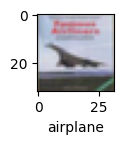

In [85]:
plot_sample(X_test, y_test,3)

In [86]:
classes[y_classes[3]]

'airplane'

In [87]:
classes[y_classes[3]]

'airplane'